# Partie 2

Dans cet atelier vous allez apprendre à untiliser Tkinter pour réaliser l'interface de l'application.
Cette interface va vous permettre de pouvoir tracer les chiffres de 0 à 9 à main levée, de voir le résultat prédit et le score que le pourcentage de certitude.


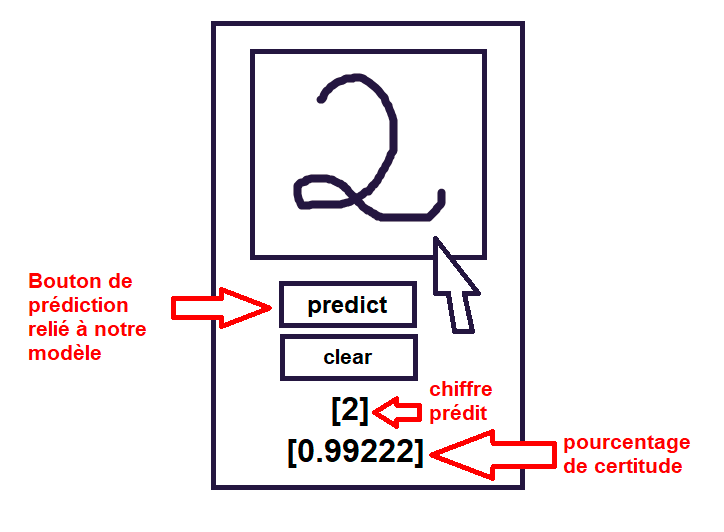


Les cellules sont exécutables, n'hésitez pas à faire des essais

### Les widget Tkinter

Pour créer un logiciel graphique vous devez dans une fenêtre, ajouter  des éléments graphiques que l'on nomme widget. Ce widget peut être tout aussi bien une liste déroulante que du texte. 

In [2]:
# coding: utf-8
 
from tkinter import * 

fenetre = Tk() # création de l'objet Tkinter

# création du widget voulu, le premier paramètre est obligatoire, c'est le widget parent
label = Label(fenetre, text="Hello World") 
label.pack() # ajout du widget à la fenêtre en utilisant la méthode pack()

fenetre.mainloop() # lancement de la boucle principale (lancement de la fenêtre)

### Les boutons

Les boutons permettent de proposer une action à l'utilisateur. Dans l'exemple ci-dessous, on lui propose de fermer la fenêtre. 

In [3]:
# bouton de sortie

fenetre = Tk() # création de l'objet Tkinter
# création du widget voulu
bouton=Button(fenetre, text="Fermer", command=fenetre.destroy)#"command" sert à indiquer ce qui se passe lors du clic
bouton.pack() # ajout du widget à la fenêtre en utilisant la méthode pack()

fenetre.mainloop() # lancement de la boucle principale (lancement de la fenêtre)

### Les labels

Les labels sont des espaces prévus pour écrire du texte. Les labels servent souvent à décrire un widget comme un input 

In [9]:
# label

fenetre = Tk() # création de l'objet Tkinter

label = Label(fenetre, text="Texte par défaut", bg="yellow") # création du widget voulu
label.pack() # ajout du widget à la fenêtre en utilisant la méthode pack()

fenetre.mainloop() # lancement de la boucle principale (lancement de la fenêtre)

### Canvas

Un canvas (toile, tableau en français) est un espace dans lequel vous pouvez dessiner ou écrire ce que vous voulez: 

In [ ]:
# canvas

fenetre = Tk() # création de l'objet Tkinter

canvas = Canvas(fenetre, width=150, height=120, background='yellow') # création du widget voulu
ligne1 = canvas.create_line(75, 0, 75, 120)
ligne2 = canvas.create_line(0, 60, 150, 60)
txt = canvas.create_text(75, 60, text="Cible", font="Arial 16 italic", fill="blue")
canvas.pack() # ajout du widget à la fenêtre en utilisant la méthode pack()

fenetre.mainloop() # lancement de la boucle principale (lancement de la fenêtre)

## Maintenant à vous de jouer

Les principales fonctions sont présentées ici, à vous de les appeler au bon endroit et au bon moment, la première partie est uniquement explicative

In [10]:
# importation des bibliothèques

from PIL import Image, ImageDraw
import tkinter as tk

import numpy as np
import tensorflow as tf

import operator

In [11]:
# définition des variables
last_point = None

width = 200  # largeur de la fenêtre
height = 200 # hauteur de la fenêtre
center = height//2 # calcul du centre
black = (255, 255) # couleur du crayon
white = (0, 255) # couleur du fond
pen_width = 7 # largeur du crayon

valid_rect_obj = None
valid_rect = (width, height, 0, 0)

sample_img_size = 28 # taille des images en pixels

In [12]:
# chemin vers le model créer précédement
checkpoint_path = 'models/model.{epoch:02d}-{val_loss:.2f}.ckpt'
model = tf.keras.models.load_model("modele_chiffres_manuscrits")

In [ ]:
# fonction principale, qui permet la détection des chiffres, elle ne prend pas de parametres
def recognize():
    # crop image
    global valid_rect
    valid_w = valid_rect[2] - valid_rect[0]
    valid_h = valid_rect[3] - valid_rect[1]
    # newsize = max(valid_w, valid_h)
    if valid_w > valid_h:
        valid_rect = (valid_rect[0], valid_rect[1] - (valid_w - valid_h)//2, valid_rect[2], valid_rect[3] + (valid_w - valid_h)//2)
    else:
        valid_rect = (valid_rect[0] - (valid_h - valid_w)//2, valid_rect[1], valid_rect[2] + (valid_h - valid_w)//2, valid_rect[3])
    margin = 4 * (100 // 28) + pen_width
    valid_rect = tuple(map(operator.sub, valid_rect, (margin, margin, -margin, -margin)))

    new_img = output_image.crop(valid_rect).resize((sample_img_size, sample_img_size), Image.LINEAR)
    new_img.convert("RGB").save("user_input.jpg")
    pixels = np.array(new_img.getdata(), np.float32)
    pixels = pixels[:,0] / 255.0
    pixels = np.reshape(pixels, [1, sample_img_size * sample_img_size])
    
    pixels =  pixels.reshape(-1,28,28,1)
    
    probabilities = model.predict(pixels, steps=1)

    pred = np.argmax(probabilities, axis=1)

    label.configure(text= str(pred))
    proba.configure(text= str(probabilities[0, pred]))

In [ ]:
def clear(): # fonction qui permet de reset le dessin
    global last_point
    global valid_rect
    global valid_rect_obj
    last_point = None
    valid_rect = (width, height, 0, 0)
    valid_rect_obj = None
    canvas.delete("all")
    draw.rectangle((0, 0, width, height), white)

In [ ]:
def buttonRelease(event): # fonction qui permet de reset la capture du dessin
    global last_point
    last_point = None

In [ ]:
# fonction qui permet de capturer la zone de dessin
def buttonMotion(event):
    global last_point
    global valid_rect
    global valid_rect_obj
    if last_point is not None:
        last_x = last_point[0]
        last_y = last_point[1]
        canvas.create_line(last_x, last_y, event.x, event.y, fill="black", width = pen_width)
        draw.line([last_x, last_y, event.x, event.y], fill=black, width = pen_width)
    last_point = (event.x, event.y)
    valid_rect = (min(valid_rect[0], event.x), min(valid_rect[1], event.y),max(valid_rect[2], event.x), max(valid_rect[3], event.y))
    if valid_rect_obj is not None:
        canvas.delete(valid_rect_obj)    
    valid_rect_obj = canvas.create_rectangle(valid_rect)

## C'est à vous

In [ ]:
# création de l'objet Tkinter
fenetre = tk.Tk()

# création de la fenêtre de dessin de Tkinter
canvas = tk.Canvas(fenetre, width=width, height=height, bg='white')
canvas.pack()


# créer une image PIL vide et créer un objet sur lequel dessiner
output_image = Image.new("LA", (width, height), color = white)
draw = ImageDraw.Draw(output_image)
canvas.pack(expand=YES, fill=BOTH)

# action effectuée quand l'utilisateur apuis sur le bouton gauche de sa souris
canvas.bind("<B1-Motion>", ????????)

# action affectuée quand l'utilisateur lâche le bouton gauche de sa souris
canvas.bind("<ButtonRelease-1>", ?????????)

# affichage de la réponse
label = tk.Label(text="Thinking..", font=("Helvetica", 30))
label.pack()

# affichage de la probalité d'avoir choisi cette réponse
proba = tk.Label(font=("Helvetica", 20))
proba.pack()

# bouton qui lance la reconaissance
btn_recognize = tk.Button(text="Recognize",command=???????)
btn_recognize.????????

# bouton qui reset la fenêtre
btn_clear = tk.Button(text="clear",command=???????)
??????.pack()

# fonction qui lance le programme
fenetre.mainloop()

## Correction

In [5]:
# importation des bibliothèques

from PIL import Image, ImageDraw
import tkinter as tk

import numpy as np
import tensorflow as tf

import operator

# création de la fenêtre d'affichage

# définition des variables
last_point = None

width = 200  # largeur de la fenêtre
height = 200 # hauteur de la fenêtre
center = height//2 # calcul du centre
black = (255, 255) # couleur du crayon
white = (0, 255) # couleur du fond
pen_width = 7 # largeur du crayon

valid_rect_obj = None
valid_rect = (width, height, 0, 0)

sample_img_size = 28 # taille des images en pixels

# chemin vers le model
checkpoint_path = 'models/model.{epoch:02d}-{val_loss:.2f}.ckpt'
model = tf.keras.models.load_model("modele_chiffres_manuscrits")


# fonction principale, qui prend les contours de l'images et y applique la détection des chiffres
def recognize():
    # crop image
    global valid_rect
    valid_w = valid_rect[2] - valid_rect[0]
    valid_h = valid_rect[3] - valid_rect[1]
    # newsize = max(valid_w, valid_h)
    if valid_w > valid_h:
        valid_rect = (valid_rect[0], valid_rect[1] - (valid_w - valid_h)//2, valid_rect[2], valid_rect[3] + (valid_w - valid_h)//2)
    else:
        valid_rect = (valid_rect[0] - (valid_h - valid_w)//2, valid_rect[1], valid_rect[2] + (valid_h - valid_w)//2, valid_rect[3])
    margin = 4 * (100 // 28) + pen_width
    valid_rect = tuple(map(operator.sub, valid_rect, (margin, margin, -margin, -margin)))

    new_img = output_image.crop(valid_rect).resize((sample_img_size, sample_img_size), Image.LINEAR)
    new_img.convert("RGB").save("user_input.jpg")
    pixels = np.array(new_img.getdata(), np.float32)
    pixels = pixels[:,0] / 255.0
    pixels = np.reshape(pixels, [1, sample_img_size * sample_img_size])
    
    pixels =  pixels.reshape(-1,28,28,1)
    
    probabilities = model.predict(pixels, steps=1)

    pred = np.argmax(probabilities, axis=1)

    label.configure(text= str(pred))
    proba.configure(text= str(probabilities[0, pred]))
    
def clear(): # fonction qui permet de reset le dessin
    global last_point
    global valid_rect
    global valid_rect_obj
    last_point = None
    valid_rect = (width, height, 0, 0)
    valid_rect_obj = None
    canvas.delete("all")
    draw.rectangle((0, 0, width, height), white)

def buttonRelease(event): # fonction qui permet de reset la capture du dessin
    global last_point
    last_point = None

# fonction qui permet de capturer la zone de dessin
def buttonMotion(event):
    global last_point
    global valid_rect
    global valid_rect_obj
    if last_point is not None:
        last_x = last_point[0]
        last_y = last_point[1]
        canvas.create_line(last_x, last_y, event.x, event.y, fill="black", width = pen_width)
        draw.line([last_x, last_y, event.x, event.y], fill=black, width = pen_width)
    last_point = (event.x, event.y)
    valid_rect = (min(valid_rect[0], event.x), min(valid_rect[1], event.y),max(valid_rect[2], event.x), max(valid_rect[3], event.y))
    if valid_rect_obj is not None:
        canvas.delete(valid_rect_obj)    
    valid_rect_obj = canvas.create_rectangle(valid_rect)

# création de l'objet Tkinter
fenetre = tk.Tk()

# création de la fenêtre de dessin de Tkinter
canvas = tk.Canvas(fenetre, width=width, height=height, bg='white')
canvas.pack()

# créer une image PIL vide et créer un objet sur lequel dessiner
output_image = Image.new("LA", (width, height), color = white)
draw = ImageDraw.Draw(output_image)
canvas.pack(expand='YES', fill='both')
canvas.bind("<B1-Motion>", buttonMotion)
canvas.bind("<ButtonRelease-1>", buttonRelease)

# affichage de la réponse
label = tk.Label(text="Thinking..", font=("Helvetica", 30))
label.pack()

# affichage de la probalité d'avoir choisi cette réponse
proba = tk.Label(font=("Helvetica", 20))
proba.pack()

# boutton qui lance la reconaissance
btn_recognize = tk.Button(text="Recognize",command=recognize)
btn_recognize.pack()

# boutton qui reset la fenêtre
btn_clear = tk.Button(text="clear",command=clear)
btn_clear.pack()

# fonction qui lance le programme
fenetre.mainloop()